# Data Cleaning

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# 1.1 Import Data

In [5]:
df = pd.read_csv("dataset.csv")
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


# 1.2 Check For Missing Values

In [6]:
df.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

# 1.3 Check Data Types

In [7]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

# 1.4 Check number of classes and distribution of classes

Spondylolisthesis    0.483871
Normal               0.322581
Hernia               0.193548
Name: class, dtype: float64


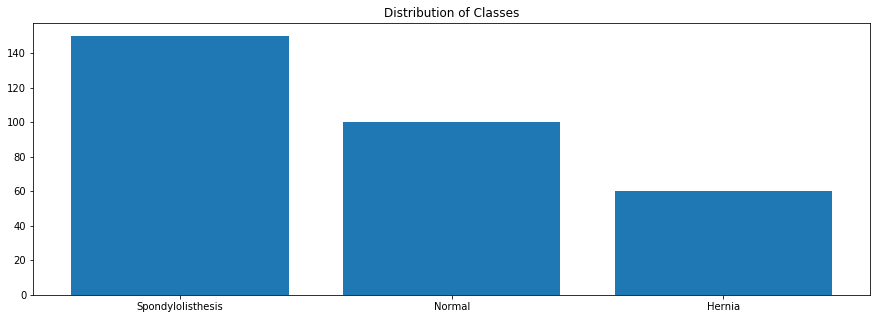

In [17]:
# print class distribution by percent
print(df["class"].value_counts(normalize=True))

# graph class distribution
plt.figure(figsize=(15, 5))
vcs = dict(df["class"].value_counts()).items()
plt.bar([x[0] for x in vcs], [x[1] for x in vcs])
plt.title("Distribution of Classes")
plt.show()

# 2.1 Stratified Train/Test Split

In [27]:
strat = StratifiedShuffleSplit()
train, test = next(strat.split(df.drop("class", axis=1), df["class"], groups=df["class"]))

In [28]:
train.shape, test.shape

((279,), (31,))

In [30]:
train = df.iloc[train]
test = df.iloc[test]

In [31]:
train.shape, test.shape

((279, 7), (31, 7))

# 2.2 Save Split Data

In [33]:
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)